<a href="https://colab.research.google.com/github/KeletsoHub/1st-Machine-Learning-project/blob/master/Iris_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline


# evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load data


In [0]:
url = 'https://raw.githubusercontent.com/AllieUbisse/end-to-end-ml/master/datasets/iris/iris_dataset.csv'
df = pd.read_csv(url, index_col=0)


# EDA

## Quick look up to data

> Indented block



In [0]:
# top 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
# last 5 rows
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# get shape of the data
# df.shape
print(f' rows(observations) = {df.shape[0]}')
print(f' columns(variables/ features ) = {df.shape[1]}')

 rows(observations) = 150
 columns(variables/ features ) = 5


In [0]:
# check missing data
df.isnull().mean()

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
class           0.0
dtype: float64

In [0]:
# data types
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [0]:
# distribution by class
 df.groupby('class').size()


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [0]:
# summary statistics
pd.set_option('precision',3)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


Iris dataset [ @UCi](http://archive.ics.uci.edu/ml/datasets/iris)

In [0]:
# correlation between the features
corr_matrix = df.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000,-0.109,0.872,0.818
sepal_width,-0.109,1.000,-0.421,-0.357
petal_length,0.872,-0.421,1.000,0.963
petal_width,0.818,-0.357,0.963,1.000


A correlation of -1 or 1 shows a full negative (-1) or positive (1) correlation respectively. Whereas a value of 0 shows no correlation at all.

- **positive correlation** (towards +1):
  - strong positive correlation {0.5,...,1}
  - weak positive correlation {0.0001,...,0.4}
- **negative correlation** ( towards -1):
  - strong negative correlation {-0.5,...,-1}
  - weak negative correlation {-0.0001,...,-0.4}

Some machine learning algorithms like **linear and logistic regression** can suffer poor performance if there are highly correlated attributes in your dataset.

In [0]:
# Skewness 
df.skew()

sepal_length    0.315
sepal_width     0.334
petal_length   -0.274
petal_width    -0.105
dtype: float64

[skew](https://www.google.com/url?sa=i&url=https%3A%2F%2Fcodeburst.io%2F2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa&psig=AOvVaw02V6Y0SvUEcXEHJRpj_zKs&ust=1586226781818000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCID8iLbh0ugCFQAAAAAdAAAAABAD)

## visualizations

We are going to look at two types of plots:

- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.

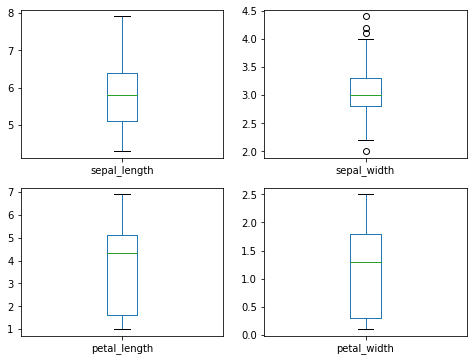

In [0]:
# univariate plots using box plot since we have numeric features
df.plot(kind='box',
             subplots=True, 
            sharex=False, sharey=False, 
             layout=(2,2),
             figsize=(8,6))

plt.show()

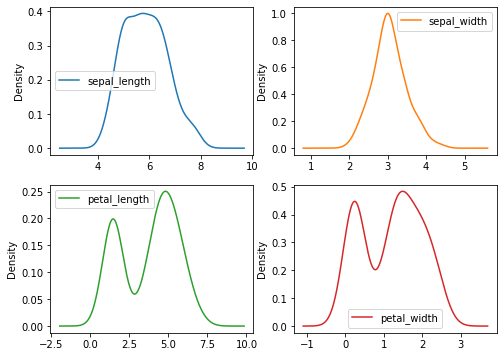

In [0]:
# histogram 
df.plot(kind='kde',
             subplots=True,
             sharex=False, sharey=False,
             layout=(2,2),
             figsize=(8,6))

plt.show()

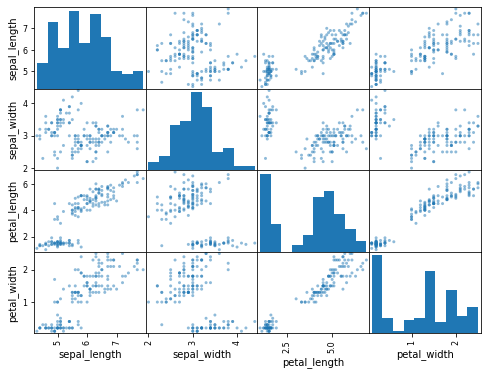

In [0]:
scatter_matrix(df, figsize=(8,6))
plt.show()

# Evaluate Algorithms

- Separate out a validation dataset.
- Set-up the test harness to use 10-fold cross validation.
- Build multiple different models to predict species from flower measurements
- Select the best model.

**NOTE**: **petal_width** is founded to be **highly correlated** with **petal_length**, so we **drop one**, in our case is **petal_width**

```python
# evaluation
from sklearn.model_selection import train_test_split

X = df.drop(['class','petal_width'], axis=1)
```

In [73]:
# separate the label from the features
# X = df.drop(['class'], axis=1)
X = df.drop(['class','petal_width'], axis=1)
y= df['class']

# split dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# show size of new subsets
X_train.shape, X_test.shape

((120, 3), (30, 3))

**Build Models**
We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

**Let’s test 6 different algorithms:**

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

In [0]:
# defining models to a list for easy evaluation
models = list()

models.append(('LR', 
               LogisticRegression(solver='liblinear', multi_class='ovr'))
              )

models.append(('LDA',
               LinearDiscriminantAnalysis()))

models.append(('KNN',
               KNeighborsClassifier()))

models.append(('CART',
               DecisionTreeClassifier()))

models.append(('NB',
               GaussianNB()))

models.append(('SVM',
               SVC(gamma='auto')))

In [77]:
# evaluate the models
results = list()
names = list()

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    results.append(cv_results)
    names.append(name)

    print(f'{name}:\nmean accuracy: {round(cv_results.mean(),5)}  \nstd accuracy: {round(cv_results.std(),5)}\n-------------------')

LR:
mean accuracy: 0.90833  
std accuracy: 0.05833
-------------------
LDA:
mean accuracy: 0.96667  
std accuracy: 0.05528
-------------------
KNN:
mean accuracy: 0.94167  
std accuracy: 0.05336
-------------------
CART:
mean accuracy: 0.88333  
std accuracy: 0.07638
-------------------
NB:
mean accuracy: 0.9  
std accuracy: 0.08975
-------------------
SVM:
mean accuracy: 0.96667  
std accuracy: 0.05528
-------------------


# Select model

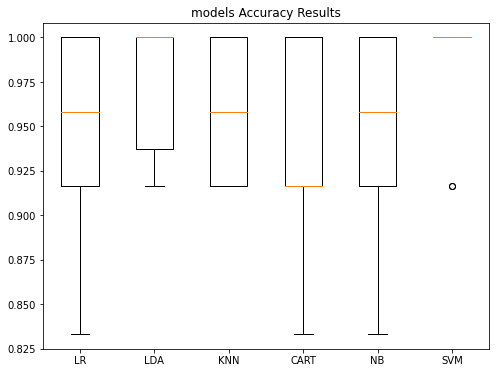

In [65]:
# ploting models accuracy results using boxplot
plt.figure(figsize= (8,6))

plt.boxplot(x=results,  labels=names)
plt.title('models Accuracy Results')
plt.show()

# Final Model (Make Predictions)
**SVM with 97% mean accuracy**

In [0]:
FinalModel = SVC(gamma='auto')

FinalModel.fit(X_train, y_train)

pred = FinalModel.predict(X_test)

In [79]:
pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [81]:
print("Accuracy Score: ",
      round(accuracy_score(y_test, y_pred= pred, normalize= True), 2) * 100
      )

print("............................................\nConfusion matrix:\n", 
      confusion_matrix(y_test, pred)
      )

print("............................................\nClassification report:\n", 
      classification_report(y_test, pred)
      )

Accuracy Score:  100.0
............................................
Confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
............................................
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

